In [1]:
from IPython.core.display import display,HTML
display(HTML("<style>.container {width:95% !important;} </style>"))

%load_ext autoreload
%autoreload 2

In [66]:
from sympy import (
    Derivative, 
    S, 
    Symbol, 
    series, 
    sqrt, 
    symbols, 
    oo, 
    limit, 
    Rational, 
    cos, 
    sin, 
    cosh, 
    sinh, 
    Matrix, 
    simplify, 
    latex, 
    lambdify,
    Function,
    collect,
    lambdify,
    solve,
    Eq,
    Poly,
    diff,Sum,
    Eq,
    integrate,
    atan,
)
import numpy as np
import pandas as pd
from sympy import init_printing
init_printing() 

from sympy.printing.latex import print_latex
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook
from pymad_hzb.PlotTools import new_plot_elems_madx
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
from acchamiltoniansandmatrices.Matrices.SymbMatrices import (
    RsymbFODO, 
    RsymbDrift6D, 
    RsymbQuad6D, 
    RsymbQuad6DChroma, 
    RsymbQuad6DThin
)
from acchamiltoniansandmatrices.Matrices.NumpyMatrices import (
    RnpFODO, 
    RnpDrift6D, 
    RnpQuad6D, 
    RnpQuad6DChroma, 
    RnpQuad6DThin
)
from acchamiltoniansandmatrices.Hamiltonians.LatticeElementHamiltonians import (
    HamDrift6D, 
    HamDrift6DParaxialSecondOrder, 
    HamQuad6D, 
    HamQuad6DParaxialSecondOrder, 
    HamQuad6DParaxialSecondOrderChroma,
)
from acchamiltoniansandmatrices.Hamiltonians.Operators import Poisson
from acchamiltoniansandmatrices.Tracking.LinearMatrixTracking import nestList, LinMap, GenerateNDimCoordinateGrid
from acchamiltoniansandmatrices.LieMaps.LieOperator import LieOperator
from acchamiltoniansandmatrices.LieMaps.Poisson import PoissonBracket

from acchamiltoniansandmatrices.Utils.JupyterHelpFunctions import hide_toggle
from acchamiltoniansandmatrices.Utils.SymbolicFunctions import SymbolTrick, fixedpoints2D

from acchamiltoniansandmatrices.Utils.JupyterHelpFunctions import hide_toggle
from acchamiltoniansandmatrices.Hamiltonians.HarmonicOscillator import (
    PotentialSymb1DHarmonicOscillator, 
    HamSymb1DHarmonicOscillator,
    Potentialnp1DHarmonicOscillator,
    Hamnp1DHarmonicOscillator
)

In [4]:
x, px, y, py, z, delta, eps, h , k0, k1, k2, sigma, betag ,f = symbols('x p_x y p_y z delta epsilon h k_0 k_1 k_2 sigma beta_gamma f', real=True)
L, beta0, gamma0 = symbols(" L beta_0 gamma_0", real=True, positive=True)

In [5]:
A = Function("A", commutative=False)(x,px)
B = Function("B", commutative=False)(x,px)
C = Function("C", commutative=False)(x,px)
D = Function("D", commutative=False)(x,px)
E = Function("E", commutative=False)(x,px)

Aop = LieOperator(A,x,px)
Bop = LieOperator(B,x,px)
Cop = LieOperator(C,x,px)

In [17]:
x, v, t, p, omega, k,m  = symbols("x v t p_x omega k m")
J, phi, Wd, lamb , theta = symbols("J phi W_d lambda theta")
# W =Function("W")(x,p,Lamb)

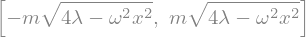

In [7]:
eq1 = HamSymb1DHarmonicOscillator(x,p,m,omega).subs(p,Wd)-2*m*lamb
solve(eq1,Wd)

In [8]:
# Define constant number symbols in sympy - otherwise they are considered variables
LQ   = SymbolTrick("L_Q")
LD   = SymbolTrick("L_D")
kq1  = SymbolTrick("K_{Q_1}")
dkq1 = SymbolTrick("\delta{K_{Q_1}}")

# inserting replacements to ignore all planes except x-px
rep = list(zip([delta, px, y, py],[0,0,0,0]))

hamq1 = HamQuad6DParaxialSecondOrder(beta0,gamma0,LQ,x,px,y,py,delta,kq1).subs(rep)
hamq2 = HamQuad6DParaxialSecondOrder(beta0,gamma0,LQ,x,px,y,py,delta,kq1+dkq1).subs(rep)

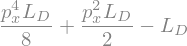

In [9]:
hamd1 = series(HamDrift6D(beta0,gamma0,LD,x,px,y,py,delta).subs(delta,0).subs(py,0).subs(beta0*gamma0,oo).subs(beta0,1),px,0,6).removeO()
hamd1

In [10]:
qdqham1 = Aop.BCH(Bop,1).BCH(Cop,1).ham.subs(A,hamq1).subs(B,hamd1).subs(C,hamq2).doit()
qdqham2 = Aop.BCH(Bop,2).BCH(Cop,2).ham.subs(A,hamq1).subs(B,hamd1).subs(C,hamq2).doit()
qdqham3 = Aop.BCH(Bop,3).BCH(Cop,3).ham.subs(A,hamq1).subs(B,hamd1).subs(C,hamq2).doit()
qdqham4 = Aop.BCH(Bop,4).BCH(Cop,4).ham.subs(A,hamq1).subs(B,hamd1).subs(C,hamq2).doit()

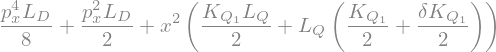

In [26]:
qc = (qdqham1+LD).collect(x**2)
qc

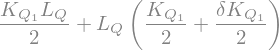

In [31]:
qc.coeff(x**2)

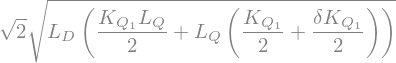

In [34]:
f1 = 1/LD #m
f2 = sqrt(LD * qc.coeff(x**2) *2) #omega0
f2

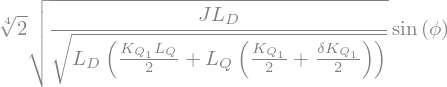

In [37]:
xr = sqrt(2*J/(f1*f2))*sin(phi)
xr

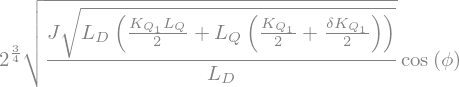

In [38]:
pr = sqrt(2*f1*f2*J)*cos(phi)
pr

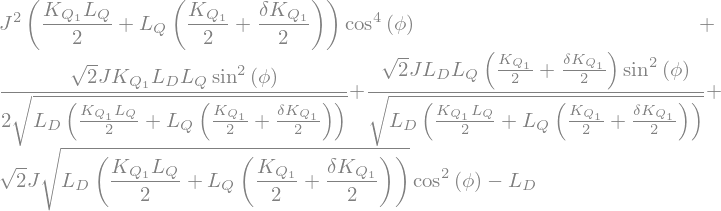

In [39]:
aa = list(zip([x,px],[xr,pr]))
qdqham1.subs(aa)

In [81]:
nu,nu0, ji0, ji1,phi0, omega0, q, p= symbols("nu nu_0 J_{i_0} J_{i_1} phi_0 omega_0 q p")

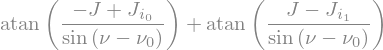

In [82]:
 atan((J-ji1)/sin(nu-nu0)) + atan(-(J-ji0)/sin(nu-nu0))

$$\phi_0 = \arctan\left( \frac{m \nu_0 q} {p} \right)$$

In [42]:
integrate(cos(theta)**4,(theta,0, np.pi*2))/(2*np.pi)

In [43]:
3/8

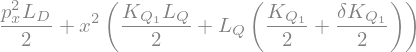

In [49]:
J0 = qc.series(px,0,4).removeO()
J0

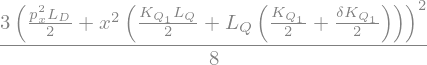

In [50]:
dH0= J0**2
dH0

When does the coefficient of cos^4 disappears?

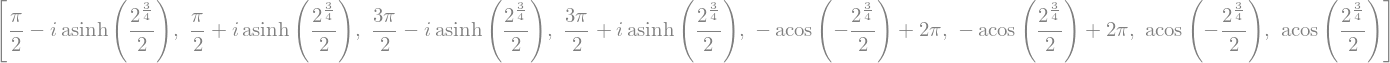

In [65]:
solve(Eq(1-2*cos(theta)**4,0),(theta))

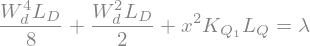

In [11]:
eq1 = Eq(qdqham1.subs(px,Wd).subs(dkq1,0)+LD, lamb)
eq1

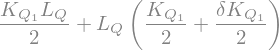

In [56]:
term = qdqham1.subs(aa).coeff(cos(phi)**4)/J**2
term

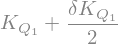

In [63]:
(term/LQ).expand().collect(kq1)

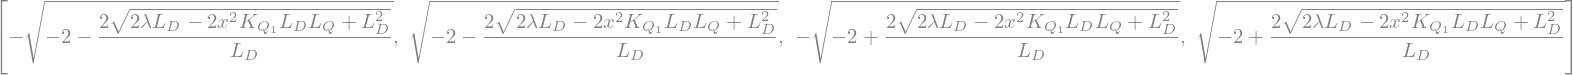

In [12]:
sol = solve(eq1,Wd)
sol

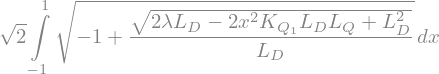

In [18]:
integrate(sol[3],(x,-1,1))

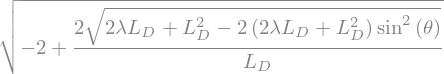

In [13]:
sol[3].subs(x,sqrt((2*lamb*LD + LD**2) /(LD*LQ*kq1))*sin(theta))

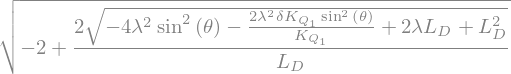

In [120]:
sol[3].subs(x,sqrt(2*lamb**2 /(LD*LQ*kq1))*sin(theta))

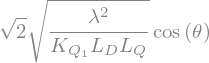

In [123]:
qqq = diff(sqrt(2*lamb**2 /(LD*LQ*kq1))*sin(theta), theta)
qqq

In [126]:
integrate(sol[3].subs(x,sqrt(2*lamb**2 /(LD*LQ*kq1))*sin(theta)) * qqq, (theta,0, 2* np.pi))

KeyboardInterrupt: 

In [127]:
integrate(theta, theta)

In [18]:
from sympy.tensor import Idx, IndexedBase

In [19]:
n = symbols('n', integer=True)
x = Idx('x',n)
v = Idx('v',n)

Lagrangian = IndexedBase('\mathcal{L}')

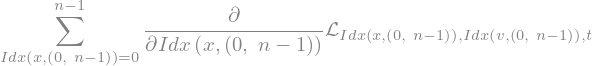

In [29]:
Sum(Derivative(Lagrangian[x,v,t],x),x)

In [51]:
Lagrangian = Function("\mathcal{L}", commutative=False)(x,v,t)
Lagrangian

In [35]:
Lagrangian.free_symbols

In [38]:
def canonical_momenta(lagrangian, coordinates, velocities):
    return [diff(lagrangian, c) for c in velocities]

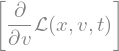

In [39]:
canonical_momenta(Lagrangian,[x],[v])

In [40]:
from sympy.physics.mechanics import dynamicsymbols

In [41]:
m = symbols('m', real = True)
g = symbols('g', real = True)
x   = dynamicsymbols('x')
xd  = dynamicsymbols('x', 1)

In [42]:
kin_energy = 0.5 * m * xd ** 2
pot_energy = m * g * x

In [43]:
m = symbols('m', real = True)
g = symbols('g', real = True)
x   = dynamicsymbols('x')
xd  = dynamicsymbols('x', 1)

kin_energy = 0.5 * m * xd ** 2
pot_energy = m * g * x

L = kin_energy - pot_energy
f = diff(diff(L, xd), 't') - diff(L, x)

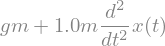

In [44]:
f

In [45]:
Lagrangian = Function("\mathcal{L}", commutative=False)(x,xd,t)

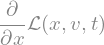

In [52]:
Derivative(Lagrangian, x)

In [53]:
x, v, t, p, omega, k,m  = symbols("x v t p_x omega k m")
J, phi = symbols("J, phi")
Lagrangian = Function("\mathcal{L}", commutative=False)(x,v,t)
Lagrangian

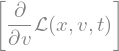

In [54]:
def canonical_momenta(lagrangian, coordinates, velocities):
    return [diff(lagrangian, c) for c in velocities]

canonical_momenta(Lagrangian, [x], [v])

In [55]:
Sum(canonical_momenta(Lagrangian, [x], [v]))

AttributeError: 'list' object has no attribute 'free_symbols'

In [61]:
q,Q,p,P,t = symbols("q Q p P t")
F1 = Function("F_1", commutative=False)(q,Q,t)
F2 = Function("F_2", commutative=False)(q,P,t) - P*Q
F3 = Function("F_3", commutative=False)(q,P,t) + p*q
F4 = Function("F_4", commutative=False)(q,P,t) + p*q - P*Q
    

In [58]:
q,Q = symbols("q Q")
F = Function("F", commutative=False)(q,Q,t)
F